In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ML2_lib import loss
from ML2_lib import DC_SGD

In [2]:
# 学習率は0.01/t * sqrt(d) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

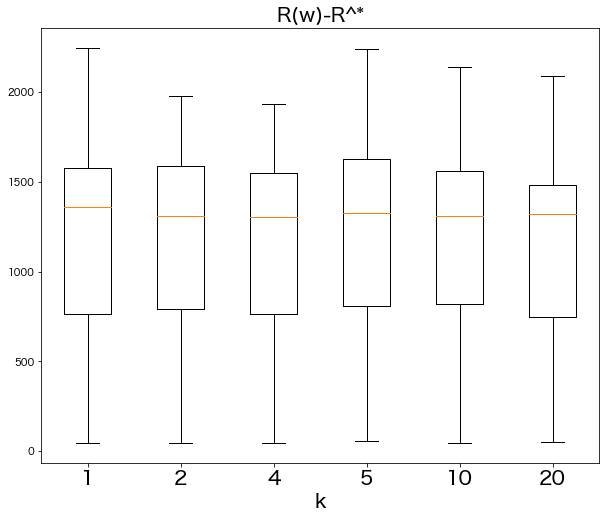

In [3]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [4]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1201.974470,1174.581120,1159.805576,1222.260162,1185.588892,1160.609306
std,639.561427,577.876299,566.097513,629.836954,591.569606,596.878823
min,44.349917,45.809419,44.002845,52.666852,46.187868,47.348402
25%,762.422657,788.828607,760.975649,807.226017,820.117232,747.241000
50%,1361.851714,1311.156495,1304.160118,1326.823293,1307.870835,1323.358202
75%,1574.319044,1586.753469,1551.457210,1627.266634,1562.983527,1479.662162
max,2247.746016,1979.432452,1931.289027,2238.980421,2142.212874,2088.126050


In [5]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1574.319044,1586.753469,1551.457210,1627.266634,1562.983527,1479.662162
0.80,1653.685959,1649.180384,1608.908138,1716.051286,1628.998400,1552.288539
0.90,1793.613791,1706.607864,1699.852141,1826.842878,1694.027446,1759.818230
0.95,2020.679903,1843.020158,1815.570584,2032.911650,1918.120160,1923.972140
0.99,2202.332793,1952.149993,1908.145338,2197.766667,2097.394331,2055.295268


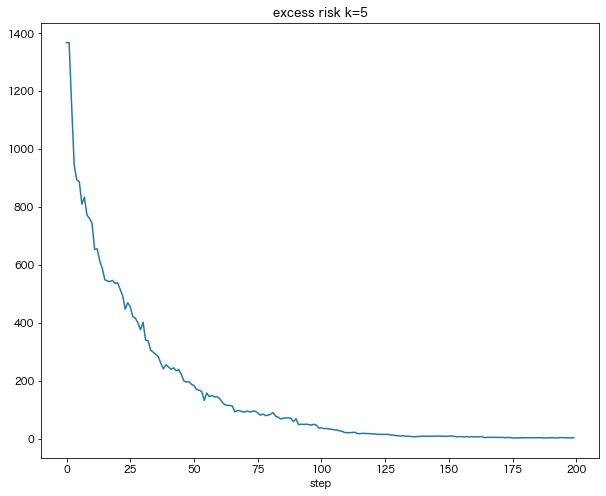

In [22]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [7]:
# 学習率は0.01/t * sqrt(d) ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=False)


  0%|          | 0/10 [00:00<?, ?it/s]

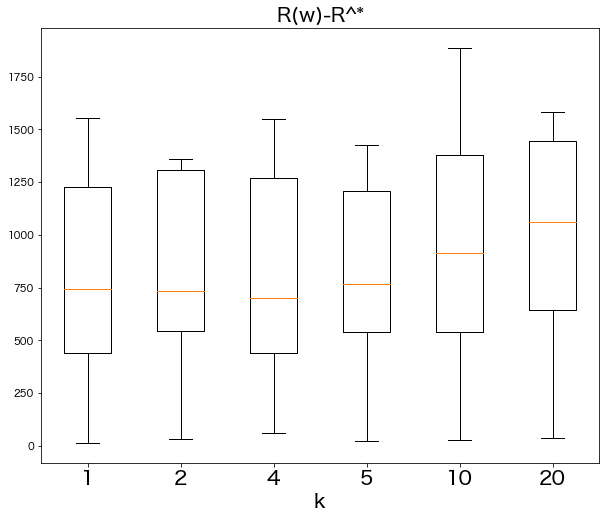

In [8]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [9]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,801.111440,837.439407,822.937957,831.808213,968.186705,999.688971
std,494.860050,469.945940,520.671469,454.317022,619.739382,525.778494
min,12.743117,32.215424,58.460419,20.756086,25.032798,37.240599
25%,439.674217,546.355142,437.836192,540.725551,538.244473,643.898851
50%,741.344574,734.937442,699.933641,767.827644,914.654163,1060.601506
75%,1228.054675,1305.922732,1271.104951,1205.812515,1380.985362,1443.760326
max,1555.175470,1358.417613,1550.294694,1425.177746,1887.695393,1582.074314


In [10]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,1228.054675,1305.922732,1271.104951,1205.812515,1380.985362,1443.760326
0.80,1291.141099,1317.620878,1396.889083,1234.727739,1451.242111,1466.688366
0.90,1343.213247,1354.964716,1545.696732,1341.707140,1718.146871,1533.566936
0.95,1449.194359,1356.691164,1547.995713,1383.442443,1802.921132,1557.820625
0.99,1533.979248,1358.072323,1549.834898,1416.830685,1870.740541,1577.223576


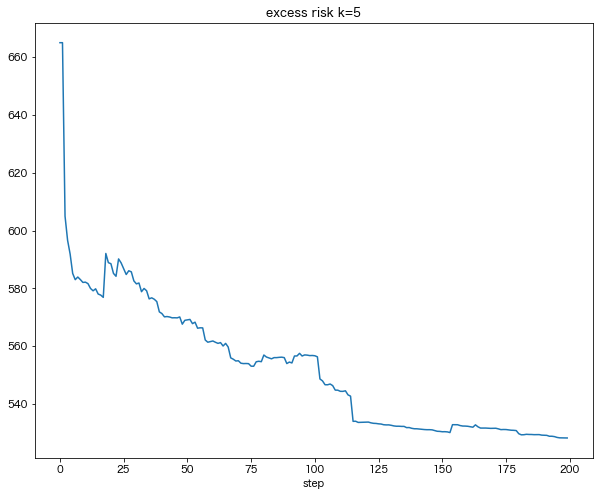

In [11]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [12]:
# 学習率は0.01/sqrt(d) (固定) ノイズは正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_normal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="normal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

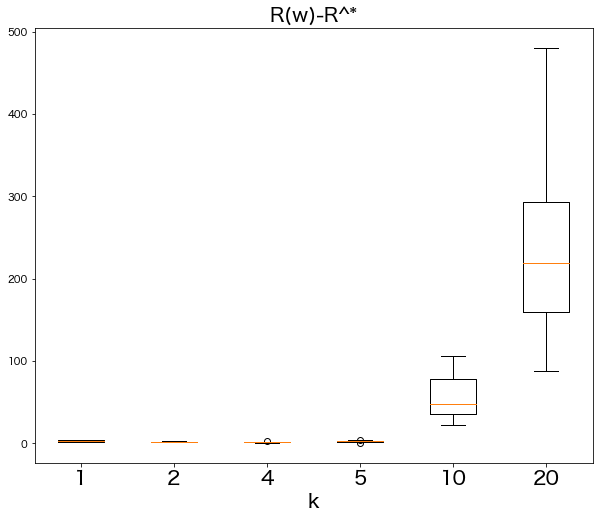

In [13]:
_, result_loss_gauss = exp_normal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_gauss[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [14]:
df = pd.DataFrame(result_loss_gauss[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.757717,1.399881,1.451289,2.413276,56.225632,246.798153
std,1.128388,0.431472,0.707042,1.193167,29.795134,121.741055
min,1.202812,0.967173,0.505658,0.272853,21.636251,88.162030
25%,1.722201,1.038163,0.968378,1.785029,35.229704,159.673635
50%,2.860231,1.326188,1.577981,2.422661,48.091767,219.580874
75%,3.712069,1.522980,1.664210,2.697700,78.394311,292.628251
max,4.168055,2.233318,2.985953,4.397988,105.745139,480.725894


In [15]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,3.712069,1.522980,1.664210,2.697700,78.394311,292.628251
0.80,3.759659,1.626534,1.689615,3.021946,86.963542,314.425980
0.90,3.878379,2.020174,1.893964,4.026419,97.171821,409.429637
0.95,4.023217,2.126746,2.439959,4.212204,101.458480,445.077766
0.99,4.139087,2.212003,2.876754,4.360832,104.887807,473.596269


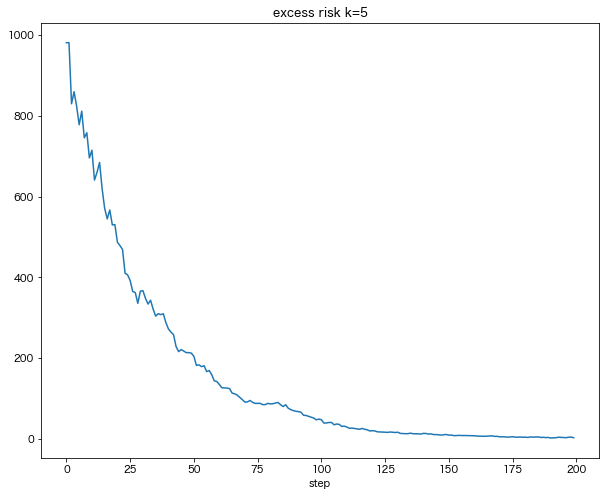

In [16]:
k = 5
_,loss_transition = exp_normal.transition(k=5,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()

In [17]:
# 学習率は0.01/sqrt(d)　（固定） ノイズは対数正規分布
X_mean = 5
X_var = 2
E_var = 2.2
w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 1000
c = 5
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)

son = loss.LinearQuadraticLoss()
exp_lognormal = DC_SGD.DCSGD(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise="lognormal",loss_type=son,c=c,fixed_lr=True)


  0%|          | 0/10 [00:00<?, ?it/s]

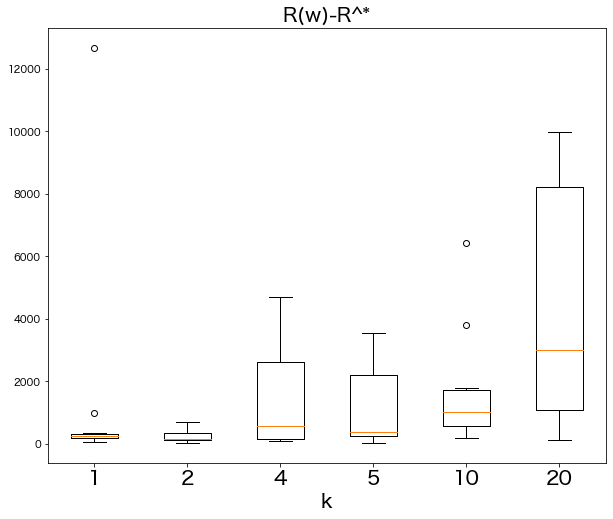

In [18]:
_, result_loss_lognormal = exp_lognormal.many_trails(trial_num=10,max_k=20)
fdic = {
    "size" : 20,
}

columns=['1', '2', '4','5','10','20']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss_lognormal[:,[0,1,3,4,9,19]])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R(w)-R^*',fontsize=20)
ax1.set_xlabel('k',fontdict=fdic)

plt.show()


In [19]:
df = pd.DataFrame(result_loss_lognormal[:,[0,1,3,4,9,19]],columns=columns)
df.describe()

,1,2,4,5,10,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1526.058181,251.564435,1539.463993,1149.517436,1727.790209,4370.199100
std,3927.759795,226.617010,1823.192903,1256.244708,1957.345450,3913.811565
min,63.934455,21.576413,84.180067,34.701888,194.309932,115.573333
25%,177.799293,103.249652,145.888499,253.028147,566.864398,1085.979033
50%,230.832185,152.863382,556.464324,363.510588,1031.033739,3009.243351
75%,323.099155,349.464108,2621.243129,2206.696741,1717.177548,8218.876013
max,12681.391651,709.126330,4692.060583,3533.940223,6427.757979,9973.451520


In [20]:
df.quantile([0.75,0.8,0.9,0.95,0.99])

,1,2,4,5,10,20
0.75,323.099155,349.464108,2621.243129,2206.696741,1717.177548,8218.876013
0.80,467.759215,420.030148,3221.080656,2425.398906,2192.708928,8981.205242
0.90,2140.014117,568.998840,4424.779709,2581.954582,4069.637702,9500.061965
0.95,7410.702884,639.062585,4558.420146,3057.947402,5248.697840,9736.756743
0.99,11627.253898,695.113581,4665.332496,3438.741659,6191.945951,9926.112565


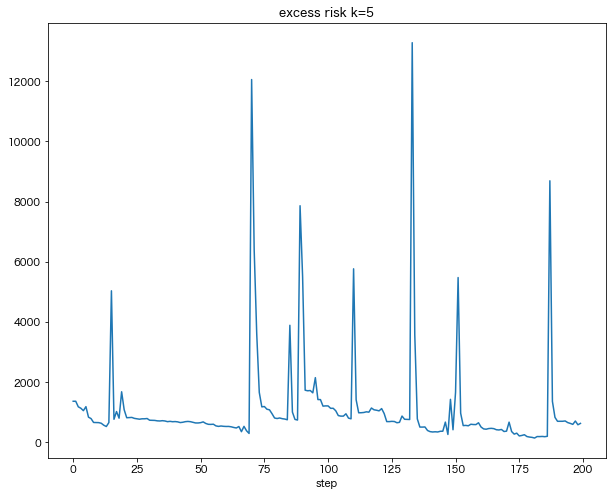

In [21]:
k = 5
_,loss_transition = exp_lognormal.transition(k=k,w_init=w_init)

fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.plot(loss_transition)
ax1.set_xlabel("step")
ax1.set_title('excess risk k={}'.format(k))
plt.show()
